# **ViewFormer**: NeRF-free Neural Rendering from Few Images Using Transformers
[Jonáš Kulhánek](https://jkulhanek.github.io/), [Erik Derner](http://people.ciirc.cvut.cz/~derneeri/), [Torsten Sattler](https://tsattler.github.io/), [Robert Babuška](http://www.robertbabuska.com/)<br>

In this notebook, you can play with the pre-trained models and evaluate them on dataset samples. Start by running the first cell.

## Contents
- [InteriorNet image generation](#InteriorNet-image-generation)
- [Common Objects in 3D image generation](#Common-Objects-in-3D-image-generation)
- [ShapeNet image generation](#ShapeNet-image-generation)
- [Shepard-Metzler-Parts-7 image generation](#Shepard-Metzler-Parts-7-image-generation)
- [7-Scenes image generation](#7-Scenes-image-generation)
- [7-Scenes localization](#7-Scenes-localization)

In [ ]:
!pip install git+https://github.com/jkulhanek/viewformer.git  # Allow viewformer import
!pip uninstall -y torchtext torchaudio  # Fix for Google Colab
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

REMOTE_URL = 'https://data.ciirc.cvut.cz/public/projects/2022ViewFormer'
!export REMOTE_URL="https://data.ciirc.cvut.cz/public/projects/2022ViewFormer"

# InteriorNet image generation
[back to top 🠕](#ViewFormer:-NeRF-free-Neural-Rendering-from-Few-Images-Using-Transformers)

In [ ]:
# 
# Load dataset and models
#

# Prepare InteriorNet dataset sample
!mkdir -p ~/.cache/viewformer/datasets/interiornet
!curl -L -o  ~/.cache/viewformer/datasets/interiornet.tar.gz $REMOTE_URL/datasets/interiornet.tar.gz
!tar -xzf ~/.cache/viewformer/datasets/interiornet.tar.gz -C ~/.cache/viewformer/datasets/interiornet
# For some resonse, in Google Colab we have to download the codebook model manually
!mkdir -p ~/.cache/viewformer/models/interiornet-codebook-th
!curl -L -o ~/.cache/viewformer/models/interiornet-codebook-th.tar.gz $REMOTE_URL/checkpoints/interiornet-codebook-th.tar.gz
!tar -xzf ~/.cache/viewformer/models/interiornet-codebook-th.tar.gz -C ~/.cache/viewformer/models/interiornet-codebook-th

# Load InteriorNet dataset
from viewformer.data.loaders import DatasetLoader

test_loader = DatasetLoader(path=os.path.expanduser('~/.cache/viewformer/datasets/interiornet'), split='test')

# Load codebook and transformer models
from viewformer.utils.tensorflow import load_model

codebook = load_model(os.path.expanduser('~/.cache/viewformer/models/interiornet-codebook-th/model.ckpt'))
transformer = load_model('interiornet-transformer-tf')

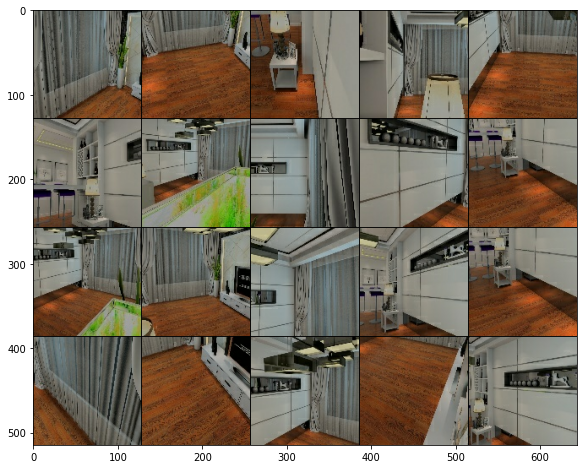

In [64]:
# Show InteriorNet sample
from viewformer.utils.visualization import np_imgrid

input_batch = test_loader[0]['frames'].astype('float32') / 255.
plt.imshow(np_imgrid(input_batch)[0])
plt.show()

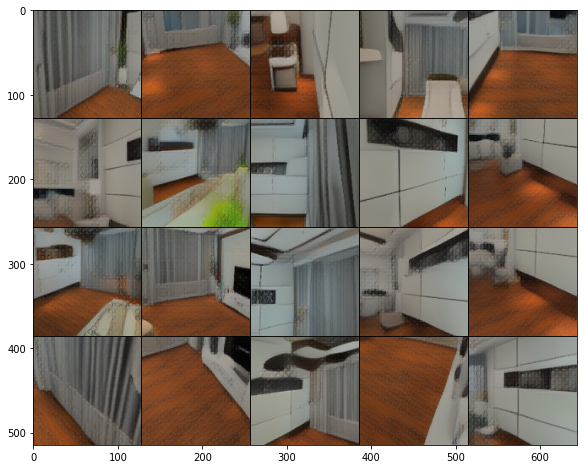

In [65]:
# Show codebook reconstruction
input_batch = test_loader[0]['frames'].astype('float32') / 255.
output_batch = np.clip(codebook(input_batch * 2 - 1)[0] / 2 + 0.5, 0, 1)

plt.imshow(np_imgrid(output_batch)[0])
plt.show()

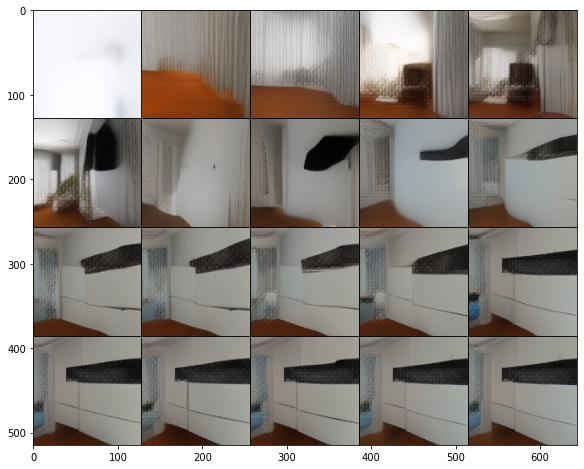

In [73]:
# Evaluate full pipeline with multiple context sizes
# Shows the last view with increasing context size
from viewformer.evaluate.evaluate_transformer_multictx import generate_batch_predictions
images, cameras = test_loader[0]['frames'][np.newaxis, ...], test_loader[0]['cameras'][np.newaxis, ...]
output = generate_batch_predictions(transformer, codebook, images, cameras)
plt.imshow(np_imgrid(output['generated_images'][0])[0])
plt.show()

## Common Objects in 3D image generation
[back to top 🠕](#ViewFormer:-NeRF-free-Neural-Rendering-from-Few-Images-Using-Transformers)

In [ ]:
# 
# Load dataset and models
#

# Prepare CO3D dataset sample
!mkdir -p ~/.cache/viewformer/datasets/co3d-apple
!curl -L -o  ~/.cache/viewformer/datasets/co3d-apple.tar.gz $REMOTE_URL/datasets/co3d-apple.tar.gz
!tar -xzf ~/.cache/viewformer/datasets/co3d-apple.tar.gz -C ~/.cache/viewformer/datasets/co3d-apple

# Load CO3D dataset
from viewformer.data.loaders import DatasetLoader

test_loader = DatasetLoader(path=os.path.expanduser('~/.cache/viewformer/datasets/co3d-apple'), split='val')

# Load codebook and transformer models
from viewformer.utils.tensorflow import load_model

codebook = load_model('co3d-10cat-codebook-th')
transformer = load_model('co3d-10cat-noloc-transformer-tf')

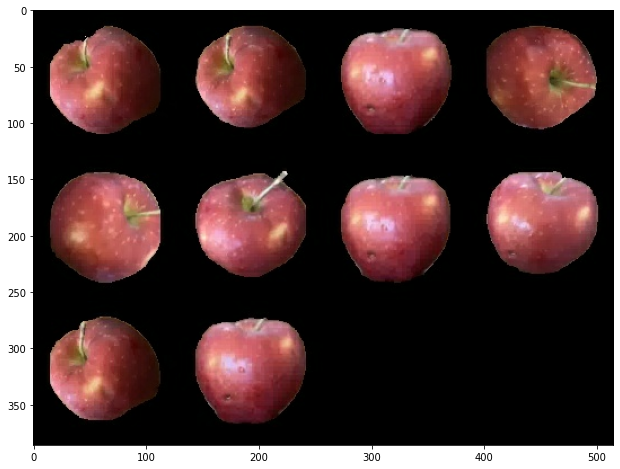

In [81]:
# Show dataset sample
from viewformer.utils.visualization import np_imgrid

input_batch = test_loader[0]['frames'][:10].astype('float32') / 255.
plt.imshow(np_imgrid(input_batch)[0])
plt.show()

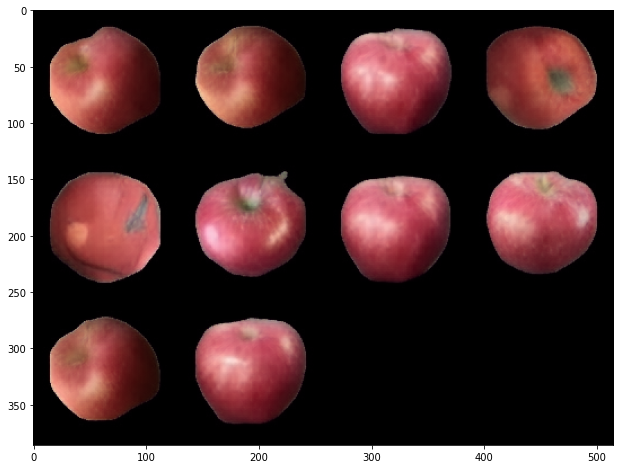

In [82]:
# Show codebook reconstruction
input_batch = test_loader[0]['frames'][:10].astype('float32') / 255.
output_batch = np.clip(codebook(input_batch * 2 - 1)[0] / 2 + 0.5, 0, 1)

plt.imshow(np_imgrid(output_batch)[0])
plt.show()

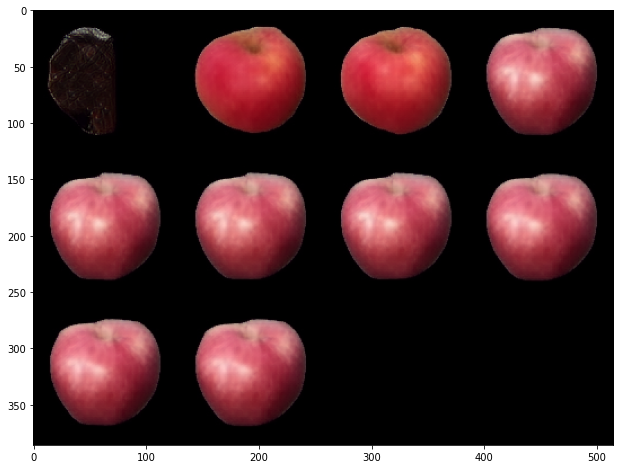

In [84]:
# Evaluate full pipeline with multiple context sizes
# Shows the last view with increasing context size
from viewformer.evaluate.evaluate_transformer_multictx import generate_batch_predictions
images, cameras = test_loader[0]['frames'][np.newaxis, :10, ...], test_loader[0]['cameras'][np.newaxis, :10, ...]
output = generate_batch_predictions(transformer, codebook, images, cameras)
plt.imshow(np_imgrid(output['generated_images'][0])[0])
plt.show()

## ShapeNet image generation
[back to top 🠕](#ViewFormer:-NeRF-free-Neural-Rendering-from-Few-Images-Using-Transformers)

In [ ]:
# 
# Load dataset and models
#

# Prepare ShapeNet dataset sample
!mkdir -p ~/.cache/viewformer/datasets/shapenet-cars
!curl -L -o  ~/.cache/viewformer/datasets/shapenet-cars.tar.gz $REMOTE_URL/datasets/shapenet-cars.tar.gz
!tar -xzf ~/.cache/viewformer/datasets/shapenet-cars.tar.gz -C ~/.cache/viewformer/datasets/shapenet-cars

# Load ShapeNet dataset
from viewformer.data.loaders import DatasetLoader

test_loader = DatasetLoader(path=os.path.expanduser('~/.cache/viewformer/datasets/shapenet-cars'), split='test', shuffle=False)

# Load codebook and transformer models
from viewformer.utils.tensorflow import load_model

codebook = load_model('shapenet-srn-codebook-th')
transformer = load_model('shapenet-srn-transforner-tf')

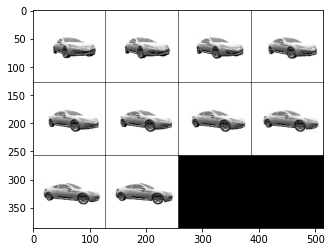

In [103]:
%matplotlib inline

# Show dataset sample
from viewformer.utils.visualization import np_imgrid

input_batch = test_loader[0]['frames'][:10].astype('float32') / 255.
plt.imshow(np_imgrid(input_batch)[0])
plt.show()

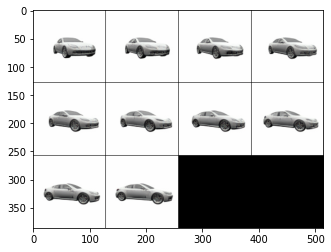

In [104]:
%matplotlib inline

# Show codebook reconstruction
input_batch = test_loader[0]['frames'][:10].astype('float32') / 255.
output_batch = np.clip(codebook(input_batch * 2 - 1)[0] / 2 + 0.5, 0, 1)

plt.imshow(np_imgrid(output_batch)[0])
plt.show()

In [ ]:
# Evaluate full pipeline and generate all images for all context views
import viewformer.evaluate.evaluate_transformer_multictx_allimg as evaluate_allimg
import tensorflow as tf


seq = test_loader[0]
c_context_views = [64, 104, 144]
frames = np.array(seq['frames'])[np.newaxis, ...]
cameras = np.stack(seq['cameras'])[np.newaxis, ...].astype('float32')
frames, cameras = tf.convert_to_tensor(frames), tf.convert_to_tensor(cameras)
codes = evaluate_allimg.encode_images(frames, codebook_model=codebook)
generated_cameras, generated_codes = [], []
tcodes = np.concatenate([np.stack([codes[:, j] for j in c_context_views + [i]], 1) for i in range(len(seq['frames']))], 0)
tcameras = np.concatenate([np.stack([cameras[:, j] for j in c_context_views + [i]], 1) for i in range(len(seq['frames']))], 0)
generated_cameras, generated_codes = evaluate_allimg.run_with_batchsize(evaluate_allimg.transformer_predict, 128, tcameras, tcodes, transformer_model=transformer)
generated_images = evaluate_allimg.run_with_batchsize(evaluate_allimg.decode_code, 32, generated_codes, codebook_model=codebook)

<IPython.core.display.Javascript object>


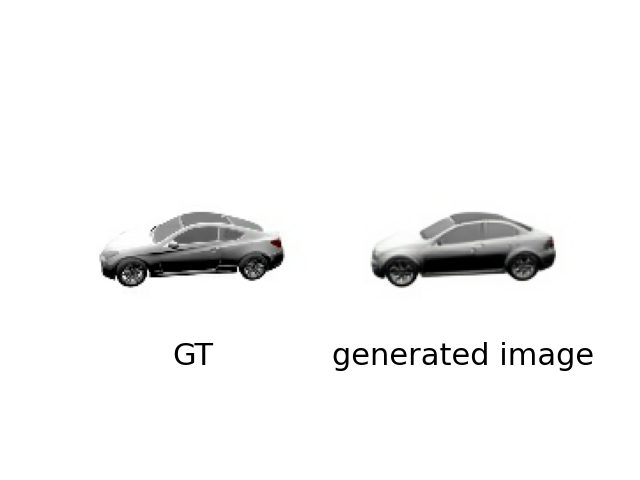

In [99]:
%matplotlib inline
from matplotlib import rc
from matplotlib import animation
rc('animation', html='jshtml')

# Show video
fig = plt.figure(figsize=(8, 4))
p1, p2 = fig.subplots(1, 2)
i1 = p1.imshow(seq['frames'][0])
p1.set_title('GT', fontsize=16, y=-0.14)
p1.axis('off')
i2 = p2.imshow(generated_images[0, -1])
p2.set_title('generated image', fontsize=16, y=-0.14)
p2.axis('off')

def ani(index):
    i1.set_data(seq['frames'][index])
    i2.set_data(generated_images[index, -1])

animator = animation.FuncAnimation(fig, ani, frames=len(generated_images), interval=50, blit=False, repeat=True)
plt.close()
animator

## Shepard-Metzler-Parts-7 image generation
[back to top 🠕](#ViewFormer:-NeRF-free-Neural-Rendering-from-Few-Images-Using-Transformers)

In [ ]:
# 
# Load dataset and models
#

# Prepare SM7 dataset sample
!mkdir -p ~/.cache/viewformer/datasets/sm7
!curl -L -o  ~/.cache/viewformer/datasets/sm7.tar.gz $REMOTE_URL/datasets/sm7.tar.gz
!tar -xzf ~/.cache/viewformer/datasets/sm7.tar.gz -C ~/.cache/viewformer/datasets/sm7

# Load SM7 dataset
from viewformer.data.loaders import DatasetLoader

test_loader = DatasetLoader(path=os.path.expanduser('~/.cache/viewformer/datasets/sm7'), split='test')

# Load codebook and transformer models
from viewformer.utils.tensorflow import load_model

codebook = load_model('sm7-codebook-th')
transformer = load_model('sm7-transformer-tf')

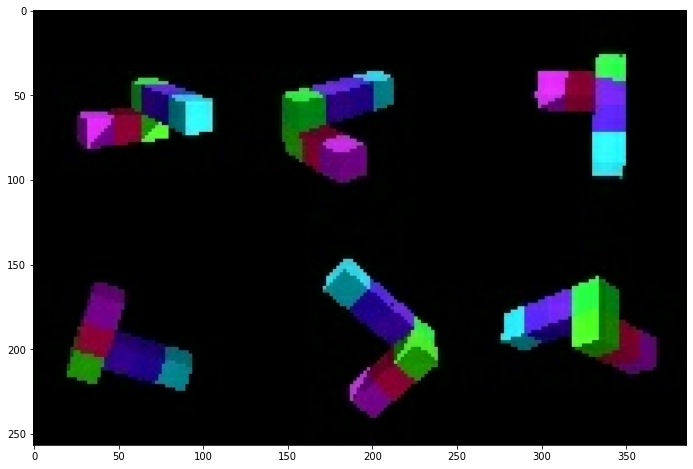

In [15]:
%matplotlib inline

# Show dataset sample
from viewformer.utils.visualization import np_imgrid

input_batch = test_loader[0]['frames'][:6].astype('float32') / 255.
plt.imshow(np_imgrid(input_batch)[0])
plt.show()

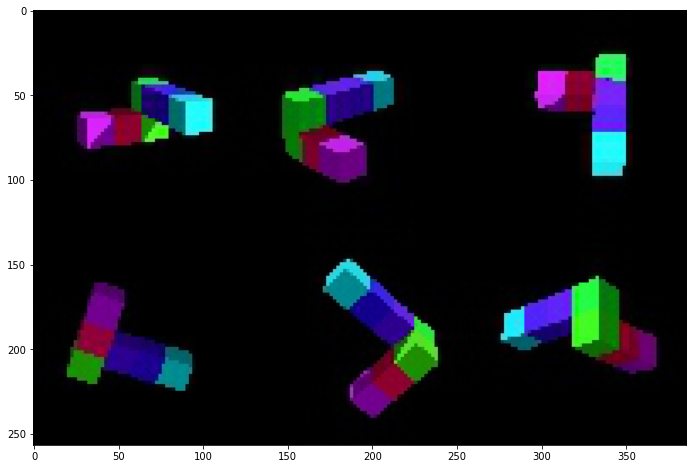

In [16]:
# Show codebook reconstruction
input_batch = test_loader[0]['frames'][:6].astype('float32') / 255.
output_batch = np.clip(codebook(input_batch * 2 - 1)[0] / 2 + 0.5, 0, 1)

plt.imshow(np_imgrid(output_batch)[0])
plt.show()

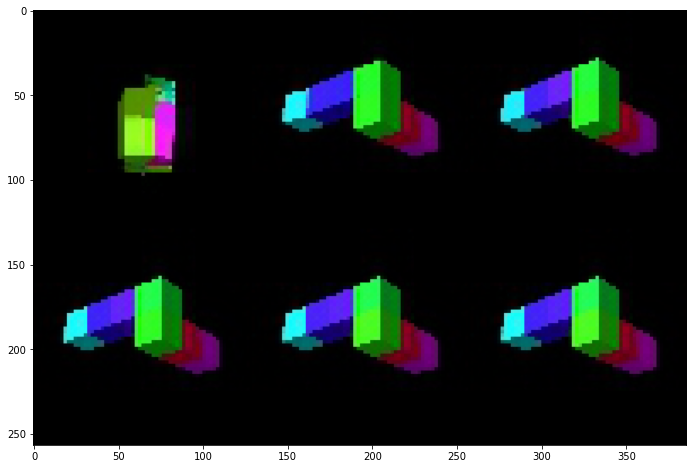

In [17]:
# Evaluate full pipeline with multiple context sizes
# Shows the last view with increasing context size
from viewformer.evaluate.evaluate_transformer_multictx import generate_batch_predictions
images, cameras = test_loader[0]['frames'][np.newaxis, :6, ...], test_loader[0]['cameras'][np.newaxis, :6, ...]
output = generate_batch_predictions(transformer, codebook, images, cameras)
plt.imshow(np_imgrid(output['generated_images'][0])[0])
plt.show()

# 7-Scenes image generation
[back to top 🠕](#ViewFormer:-NeRF-free-Neural-Rendering-from-Few-Images-Using-Transformers)

In [ ]:
# 
# Load dataset and models
#

# Prepare 7-Scenes dataset sample
!mkdir -p ~/.cache/viewformer/datasets/7scenes/chess
!curl -L -o  ~/.cache/viewformer/datasets/7scenes-chess.tar.gz $REMOTE_URL/datasets/7scenes-chess.tar.gz
!tar -xzf ~/.cache/viewformer/datasets/7scenes-chess.tar.gz -C ~/.cache/viewformer/datasets/7scenes/chess

# Load SM7 dataset
from viewformer.data.loaders import DatasetLoader

test_loader = DatasetLoader(path=os.path.expanduser('~/.cache/viewformer/datasets/7scenes/chess'), split='test')

# Load codebook and transformer models
from viewformer.utils.tensorflow import load_model

codebook = load_model('7scenes-finetuned-interiornet-codebook-th')
transformer = load_model('7scenes-finetune-both-transformer-tf')

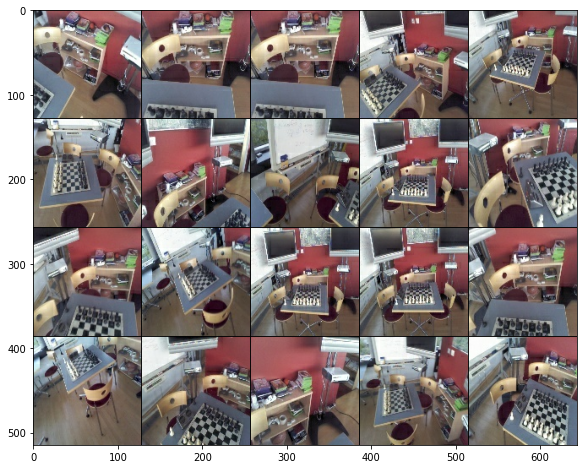

In [31]:
# Show dataset sample
from viewformer.utils.visualization import np_imgrid

input_batch = test_loader[0]['frames'].astype('float32') / 255.
plt.imshow(np_imgrid(input_batch)[0])
plt.show()

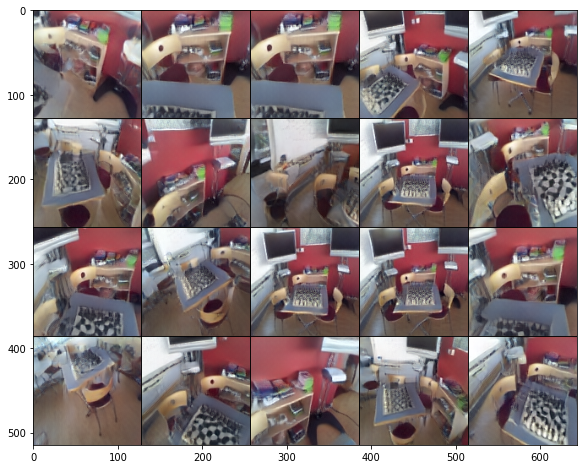

In [32]:
# Show codebook reconstruction
input_batch = test_loader[0]['frames'].astype('float32') / 255.
output_batch = np.clip(codebook(input_batch * 2 - 1)[0] / 2 + 0.5, 0, 1)

plt.imshow(np_imgrid(output_batch)[0])
plt.show()

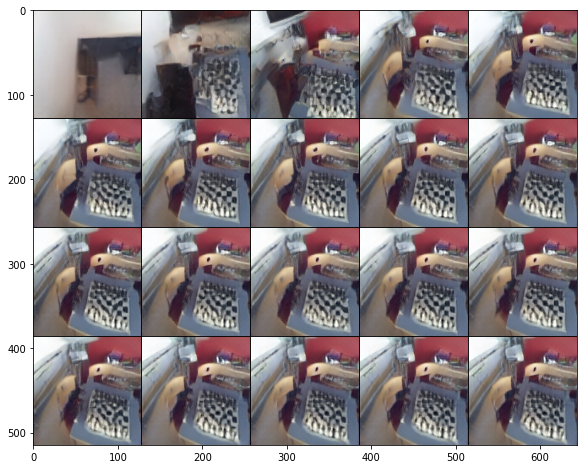

In [37]:
# Evaluate full pipeline with multiple context sizes
# Shows the last view with increasing context size
from viewformer.evaluate.evaluate_transformer_multictx import generate_batch_predictions

images, cameras = train_loader[0]['frames'][np.newaxis, :19, ...], train_loader[0]['cameras'][np.newaxis, :19, ...]
images = np.concatenate([images, test_loader[0]['frames'][np.newaxis, 19:20]], 1)
cameras = np.concatenate([cameras, test_loader[0]['cameras'][np.newaxis, 19:20]], 1)
output = generate_batch_predictions(transformer, codebook, images, cameras)
plt.imshow(np_imgrid(output['generated_images'][0])[0])
plt.show()

# 7-Scenes localization
[back to top 🠕](#ViewFormer:-NeRF-free-Neural-Rendering-from-Few-Images-Using-Transformers)

In [ ]:
# 
# Load dataset and models
#

# Prepare 7-Scenes dataset sample
!mkdir -p ~/.cache/viewformer/datasets/7scenes/chess
!curl -L -o  ~/.cache/viewformer/datasets/7scenes-chess.tar.gz $REMOTE_URL/datasets/7scenes-chess.tar.gz
!tar -xzf ~/.cache/viewformer/datasets/7scenes-chess.tar.gz -C ~/.cache/viewformer/datasets/7scenes/chess

# Load SM7 dataset
from viewformer.data.loaders import DatasetLoader

test_loader = DatasetLoader(path=os.path.expanduser('~/.cache/viewformer/datasets/7scenes/chess'), split='test')

# Load codebook and transformer models
from viewformer.utils.tensorflow import load_model

codebook = load_model('7scenes-finetuned-interiornet-codebook-th')
transformer = load_model('7scenes-finetune-both-transformer-tf')

In [56]:
# Evaluate full pipeline with multiple context sizes
# Prints difference between the predicted pose and ground truth for each context size
# It shows the difference in x, y, z and the difference between the GT and predicted quaternion (w, a, b, c)
from viewformer.evaluate.evaluate_transformer_multictx import generate_batch_predictions
from IPython.display import HTML, display

images, cameras = train_loader[0]['frames'][np.newaxis, :19, ...], train_loader[0]['cameras'][np.newaxis, :19, ...]
images = np.concatenate([images, test_loader[0]['frames'][np.newaxis, 19:20]], 1)
cameras = np.concatenate([cameras, test_loader[0]['cameras'][np.newaxis, 19:20]], 1)
output = generate_batch_predictions(transformer, codebook, images, cameras)

# Show the table
data = (output['ground_truth_cameras'] - output['generated_cameras'])[0]
display(HTML('''
<table><thead><tr>
<td>ctx. size</td>
<td>x</td>
<td>y</td>
<td>z</td>
<td>w</td>
<td>a</td>
<td>b</td>
<td>c</td>
</tr></thead><tbody>''' +
''.join(f'<tr><td>ctx: {i}</td>' +
        ''.join(f'<td>{cell:.2f}</td>' for cell in row) +
'</tr>'
for i, row in enumerate(data))
+ '''
</tbody></table>'''))